Example on contouring on a Surface: temperature on the 25 isohaline in the central SoG

In [2]:
import cmocean.cm as cm
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import netCDF4 as nc
import numpy as np

%matplotlib inline

/home/sallen/anaconda/envs/py3/lib/python3.5/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')
/home/sallen/anaconda/envs/py3/lib/python3.5/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [131]:
istart, iend = 415, 480
jstart, jend = 245, 290
di = iend - istart
dj = jend - jstart

In [132]:
mydatafile = nc.Dataset('/data/sallen/results/MEOPAR/new_waves/part5_05jul17/mean_T_05jul17.nc')
vosaline = mydatafile['vosaline'][0, :, istart:iend, jstart:jend]
votemper = mydatafile['votemper'][0, :, istart:iend, jstart:jend]
deptht = mydatafile['deptht'][:]
mydatafile.close()

In [133]:
mymesh = nc.Dataset('/home/sallen/MEOPAR/sea_initial/mesh_mask201803b.nc')
mbathy = mymesh['mbathy'][0, istart:iend, jstart:jend]
print(mbathy.shape)
mymesh.close()

(65, 45)


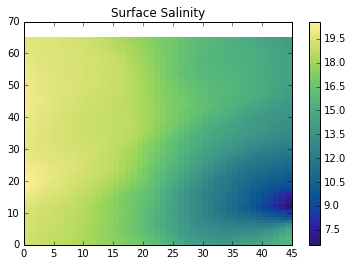

In [143]:
plt.pcolormesh(vosaline[0], cmap=cm.haline)
plt.colorbar()
plt.title('Surface Salinity')

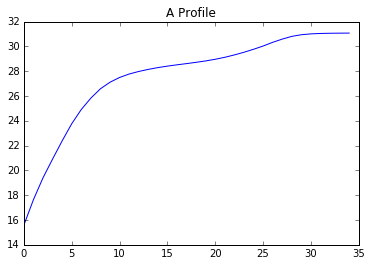

In [144]:
plt.plot(vosaline[:mbathy[25,25], 25, 25])
plt.title('A Profile')

In [136]:
sal = 25.
depthS = np.zeros_like(vosaline[0])
TonS = np.zeros_like(depthS)
for i in range(di):
    for j in range(dj):
        if mbathy[i, j] > 0:
            depthS[i, j] = np.interp(sal, vosaline[:mbathy[i, j], i, j], deptht[:mbathy[i, j]])
            TonS[i, j] = np.interp(depthS[i, j], deptht[:mbathy[i, j]], votemper[:mbathy[i,j], i, j])

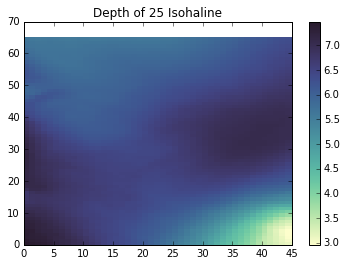

In [145]:
plt.pcolormesh(depthS, cmap=cm.deep)
plt.colorbar()
plt.title('Depth of 25 Isohaline')

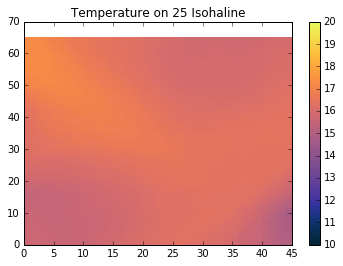

In [146]:
plt.pcolormesh(TonS, cmap=cm.thermal, vmax= 20, vmin=10)
plt.colorbar()
plt.title('Temperature on 25 Isohaline')

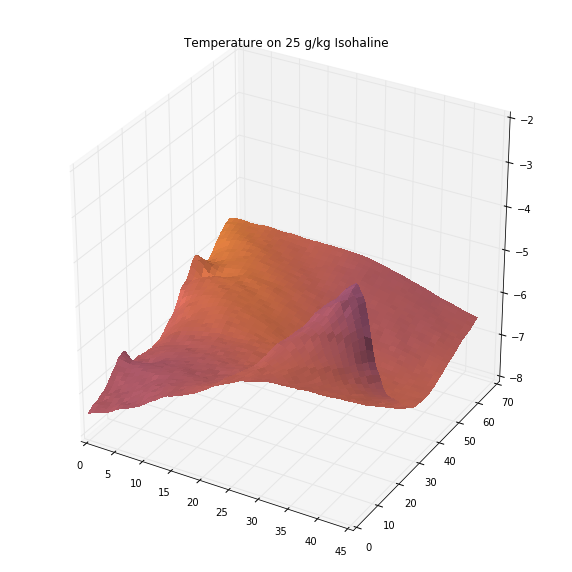

In [149]:
fig = plt.figure(figsize=(10, 10))
ax = fig.gca(projection='3d')
ax.set_title('Temperature on 25 g/kg Isohaline')
X, Y = np.meshgrid(range(dj), range(di))
surf = ax.plot_surface(X, Y, -depthS, facecolors=cm.thermal((TonS-10)/10.), vmax=1, vmin=0, 
                       linewidth=0, antialiased=False, rstride=1, cstride=1)